# Anwengungsbeispiel Regression: CooPick

## Über das Projekt CooPick

Der Prozess des Verpackens von Früchten umfasst die Prozessschritte: Portionierung, Qualitätskontrolle, Auflegen auf einen Träger, Verpackung und gegebenenfalls Nebenprozesse. Je nach Flexibilitäts- und Kapazitätsbedarf erfolgt das Auflegen von empfindlichen Früchten auf die Ladungsträger (Trays) meistens manuell.
Das Ziel dieses Projektes war es, die Entwicklung eines kollaborativen Fruchtauflegesystems, welches sowohl hinsichtlich des Mitarbeiter- als auch des Robotereinsatzes skalierbar ist und bei der automatisierten Aufnahme und Ablage der Früchte an definierten Koordinaten in definierter Orientierung sowie der Qualitätskontrolle unterstützen kann. Das entwickelte System wurde auf der Grundlage der Anforderungen und Qualitätsstandards für Äpfel entwickelt, kann aber an verschiedene andere Arten von Früchten angepasst werden. Die Früchte werden auf einem speziellen Förderband transportiert, das vom Hauptsystem gesteuert wird, so dass die Geschwindigkeit und Position des Bandes bekannt ist. Ein Kamerasystem erkennt die Position und Defekte der Früchte und sendet diese Informationen an ein Robotersystem mit zwei Roboterarmen, die mit speziell angepassten Greifern ausgerüstet sind. Die Roboter nehmen die freigegebenen Früchte auf, ohne deren Qualität zu beeinträchtigen und können dabei mit Mitarbeitern am Förderband zusammenarbeiten.


<img src="Photos/20200304_111109.jpg" style="width:200px">
<img src="Photos/20200304_112452.jpg" style="width:500px">


## Ziel: Lageerkennung

Die Lageerkennung ist eine Herausforderung für die Deep-Learning Bildverarbeitung, denn um die Drehung eines Objektes im Raum erkennen zu können, benötigt man eine Datenbank mit allen möglichen Drehungen. Da es unendlich viele verschiedene Blickwinkel gibt, besteht der erste Schritt zur Erstellung der Datenbank darin, die Rotationen zu diskretisieren und die möglichen Redundanzen aufgrund der Symmetrie der Äpfel zu analysieren. Da das manuelle Drehen der Äpfel umständlich und ungenau ist, wurde eine Konstruktion mit Schrittmotor geschaffen, welche die Äpfel drehen und die benötigten Informationen entsprechend der Drehung erfassen kann. Sobald eine Umdrehung bezogen auf eine Achse vollendet ist, wird das Objekt erneut manuell eingespannt, damit nun um zweite Achse rotiert und der Prozess erneut gestartet werden kann.

## Wie kann einen Winkel vorhergesagt werden?

Ein Winkel ist ein kontinuierlicher Wert.

### Klassifikation:
    Es wäre möglich Winkeln in klassen zu verteilen. zB: 
    x=10, 20, 30 ...
    y=10, 20, 30 …
    und jede mögliche kombinationen von x und y. 
    
   <font color='orange'>Nachteile:</font>
   * Zu viele Klassen.
   * Nur diskrete werte wurden auch vorhergesagt

### Regression: 

Alle Werte können vorhergesagt werden. NN haben als output kontinuierlicher Werte, die durch eine softmax funktion in klassen verteilt werden. In diesem Fall wurde diese Schritt ausfallen. 


<img src="Photos/stepper.png" style="width:300px">

Es wurde eine Farbkamera, die von oben auf das Objekt fokussiert ist. Dies ermöglicht die Erzeugung künstlicher Rotationen, indem das Bild digital um den Mittelpunkt des Apfels gedreht wird.

<img src="Photos/xrot.png" style="width:500px">
<img src="Photos/zrot.png" style="width:500px">

## Was soll den Input und Output sein?
### Input: Bild mit einem Apfel

Die Bildern wurden semi-automatisch erzeugt. 
 - Schrittmotor + künztliche rotation

Daten: 
 - wie sind die Daten gespeichert?
 - wie sehen die Bildern aus?
 

In [1]:
from fastai.vision.all import *

In [2]:
#path_apples=Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung')
#Datensatz in Colab montieren
url_photos = 'https://data.ips.biba.uni-bremen.de/Lehre/dsmlpl_SS21/Apples_Reg_all.tgz'
path_apples = untar_data(url_photos)
path_apples.ls().sorted()

(#35) [Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_01'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_01flipped'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_01new'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_01seg'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_02'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_02flipped'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_02new'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_02seg'),Path('/home/ara/Dokumente/CNN_Python/Pr

In [3]:
path_apples_4 = path_apples/'Apple_04'
apple_4_files = path_apples_4.ls(file_exts='.png').sorted()
apple_4_files

(#614) [Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0000_X_000_Z_00.png'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0001_X_010_Z_-80.png'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0002_X_020_Z_-80.png'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0003_X_030_Z_-80.png'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0004_X_040_Z_-80.png'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0005_X_050_Z_-80.png'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0006_X_060_Z_-80.png'),Path('/home/ara/Dokumente/CNN_Pyth

In [4]:
apple_4_files[0].name

'0000_X_000_Z_00.png'

### Output: Winkel in x,z,y

Ein Apfel ist normalerweise in einem Axis symmetrisch, dann werden nur 2 Axis gebraucht.

Diese Information ist im Name des Bilds gespeichert: 

zum Beispiel: 0005_X_055_Z_05.png

- Bildnummer = 0005
- Winkel in X = 55°
- Winkel in Z = 5°

Mit 'Regular Expression operations' kann man diese Information herausfinden

In [6]:
file_name = apple2.name

xz_reg = re.compile(r'X_(-?\d+)_Z_(-?\d+).png$')
x=float(xz_reg.search(str(file_name)).group(1))
z=float(xz_reg.search(str(file_name)).group(2))

x,z

(30.0, -80.0)

Trotzdem haben Winkeln in Grad große Nachteile für das Trainieren von CNN. 
- Die Inputs der NN sind normalisiert, daher sind Werte nahe der Einheit vorzuziehen. Zum Beispiel, es sollten Radians anstelle von Graden verwendet werden. Noch besser ist es, Quaternionen zu verwenden, die Werte zwischen -1 und 1 enthalten.
- Gimbal Lock: In diesem Zustand liegen zwei der möglichen drei Drehachsen parallel zueinander und das System hat dadurch einen Freiheitsgrad weniger.
- 0° = 360°

Deswegen werden oft Quaternionen benutzt:

Die Funktion get_y liest die name von einem Bild und ergibt die dazugehörige Quaternionen. 

In [7]:
from transforms3d.euler import euler2quat, quat2euler, mat2euler, euler2mat 

def get_y(file_name):
    pat = r'X_(-?\d+)_Z_(-?\d+).png$'
    pat = re.compile(pat)
    x=float(pat.search(str(file_name)).group(1))*3.1415926/180
    z=float(pat.search(str(file_name)).group(2))*3.1415926/180
    mat=euler2mat(x,0,z, axes='sxyz')
    return np.reshape(mat,9)



In [8]:
get_y(file_name)

array([ 0.1736482 ,  0.85286853, -0.49240387, -0.98480775,  0.15038375,
       -0.0868241 , -0.        ,  0.49999999,  0.86602541])

An sich ist ein DataBlock in Fastai nur eine Vorlage, um die Daten zusammenzustellen. 

Normalerweise wird den DataBlock aufgebaut, indem die Folgende Fragen beantwortet werden:

- Datatyp von Inputs und Outputs? Hier Bilder und Nummern
- wo befinden sich die Daten? Hier in Dateinamen in Unterordnern
- muss etwas auf die Inputs angewendet werden? Hier nein
- muss etwas auf die Outputs angewandt werden? Hier die Funktion get_y
- wie werden die Daten aufgeteilt? Hier zufällig
- müssen wir etwas auf geformte Elemente anwenden? Hier eine Größenänderung (Resize)
- müssen wir etwas auf batch_transformations anwenden? Hier keine

Damit kann ein dataloader erstellt werden. Dies erhalt die Training und Validation Datenseztse, um die CNN zu trainieren!

In [9]:
path = path_apples
dblock = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  = RandomSplitter(valid_pct=0.2,seed=7),
                   get_items = get_image_files,
                   get_y = get_y,
                   item_tfms = Resize(90),
                  )

dls = dblock.dataloaders(path)


In [10]:
dls.train_ds[0:5]

[(PILImage mode=RGB size=190x190,
  tensor([ 0.1736,  0.6330, -0.7544,  0.9848, -0.1116,  0.1330, -0.0000, -0.7660,
          -0.6428])),
 (PILImage mode=RGB size=190x190,
  tensor([ 0.7660, -0.3214,  0.5567,  0.6428,  0.3830, -0.6634, -0.0000,  0.8660,
           0.5000])),
 (PILImage mode=RGB size=190x190,
  tensor([ 0.3420, -0.3214, -0.8830,  0.9397,  0.1170,  0.3214, -0.0000, -0.9397,
           0.3420])),
 (PILImage mode=RGB size=190x190,
  tensor([ 0.9063,  0.4210,  0.0368, -0.4226,  0.9029,  0.0790, -0.0000, -0.0872,
           0.9962])),
 (PILImage mode=RGB size=190x190,
  tensor([ 0.9397,  0.2620,  0.2198, -0.3420,  0.7198,  0.6040, -0.0000, -0.6428,
           0.7660]))]

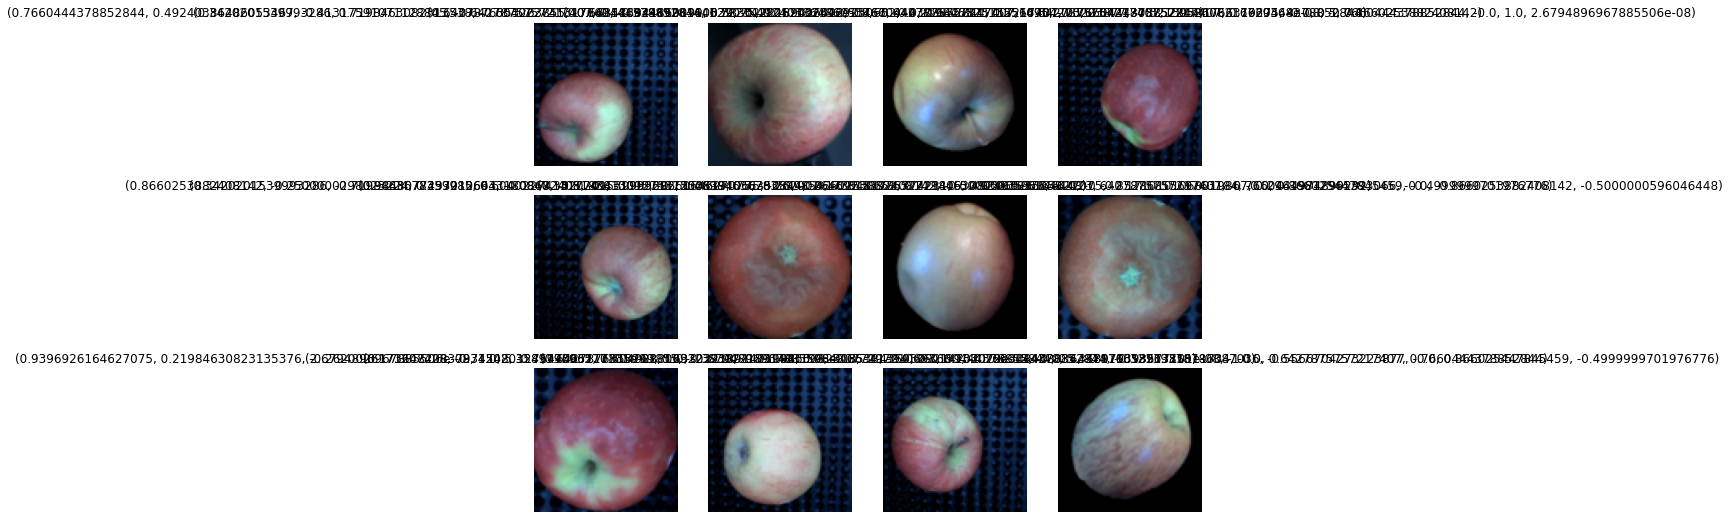

In [11]:
dls.show_batch(max_n=12)

In [12]:
# lean objekt erzeugen
learn = 

Input von cnn_learner:

- dls: Wir benutzen die Daten auf dem Dataloader
- Transfer learning: Wir benutzen eine vortranierte CNN (resnet34,pretrained=True)
- Metrics: Wir werden beobachten ob den mae (mean absolute error) und mse (mean squared error) besser werden. 

## Jetzt können Sie tranieren, aber:
- welche Learning Rate soll man hier benutzen?

        Standard Vorgehen: einfach testen mit 0.1, 0.01, 0.001

- wie viele epoche?

        auch testen, wie lange braucht mein Netzt zum Lernen? 
        overfitting?
        z.B. 10 epochen


In [1]:
# lr auswählen und tranieren! 


In [ ]:
 learn.fit_one_cycle(?,?)

wir können erstmal mit einem Bild aus den Datensatz testen, ob die Vorhersage gut ist:

(50.00004091511464, -30.000025785229777)

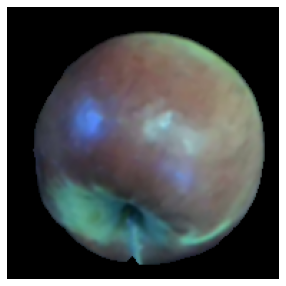

In [24]:
# Image from the validation dataset:
valid_image = dls.valid_ds[0][0]
valid_image.show()
#print(dls.valid_ds[0][1])
quaternion_mat = dls.valid_ds[0][1].reshape([3,3])
quaternion_mat
euler=mat2euler(quaternion_mat,axes='sxyz')
X,Z = euler[0]*180/3.14159, euler[2]*180/3.14159
X,Z

In [25]:
# Predict the quaternion matrix and show the euler angles
pred = learn.predict(dls.valid_ds[0][0])
quaternion_mat = pred[1].reshape([3,3])
quaternion_mat
euler=mat2euler(quaternion_mat,axes='sxyz')
Xp,Zp = euler[0]*180/3.14159, euler[2]*180/3.14159
Xp,Zp

(55.85399111225441, -27.65266390383988)

In [26]:
# mean absoule error
Xerror = np.abs(Xp-X)
Zerror = np.abs(Zp-Z)
Xerror, Zerror

(5.853950197139774, 2.3473618813898973)

Das ist ganz gut, aber das ist nur einen Bild. Das sollten wir für jedes Bild im Datensatz durchführen

In [27]:
# versuchen Sie den mittleren Absolutfehler für alle Bilder zu berechnen

## War der Fehler klein (unter 15 grad) ? 

jetzt soll man auch mit echten Bildern testen

In [1]:
#test_path = Path()/'../../Testset'
url_photos = 'https://data.ips.biba.uni-bremen.de/Lehre/dsmlpl_SS21/Apples_Reg_Test.tgz'
test_path = untar_data(url_photos)


NameError: name 'untar_data' is not defined

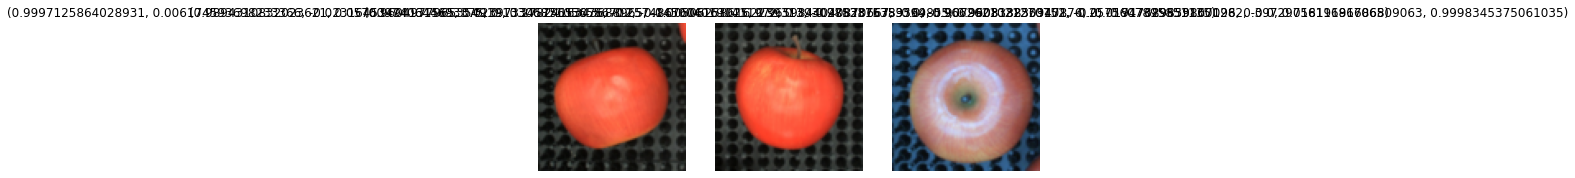

In [80]:
def get_mat(file_name):
    pat = r'X_(-?\d+\.\d*)_Z_(-?\d+\.\d*).jpg$'
    pat = re.compile(pat)
    x=float(pat.search(str(file_name)).group(1))*3.1415926/180
    z=float(pat.search(str(file_name)).group(2))*3.1415926/180
    mat=euler2mat(x,0,z, axes='sxyz')
    return np.reshape(mat,9)

test_dblock = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  = RandomSplitter(valid_pct=0.9,seed=7),
                   get_items = get_image_files,
                   get_y = get_mat,
                   item_tfms = Resize(90), 
                  )




test_dls = test_dblock.dataloaders(test_path,bs=3)
test_dls.show_batch()

In [30]:
learn.dls = test_dls

In [2]:
# versuchen Sie nochmal den mittleren Absolutfehler für alle Bilder zu berechnen

## Wir haben ein Problem! Mit echten Daten geht es gar nicht! Warum?!

## Warum klappt es nicht?

### 1. Poblem: Die Bilder im Validierungs- und Trainings-Set sind praktisch gleich.
Da die Bildern zufällig ausgewählt sind und nur wenige Winkel gedreht sind, sind Äpfel im Validierungs- und Trainings-Set praktisch gleich. Aus diesem Grund scheint es, als ob das Netzwerk perfekt funktioniert, aber in Wirklichkeit hat das Netz genau den Winkel diesen 20 Äpfel zu unterscheiden und nicht andere Äpfel.

### 1. Lösung: Unterschiedliche Äpfel für den Trainings- und Validierungssatz.

z. B. die ersten 15 Äpfel zum Trainieren und die letzten 5 Äpfel zum Validieren verwenden.

### 2. Problem: In den Trainingsbildern sind die Bildränder zu erkennen.

Sobald sie gedreht werden, sind die ränder zu sehen (Apfel 4). Dies kann vom neuronalen Netzwerk verwendet werden, um eine Drehung zu erkennen, aber in einem realen Beispiel wird dies nicht geben. 
### Lösung: Solche Äpfel nur für die Validierung benutzen.






jetzt haben wir verschiedene Äpfel für das Training und Validierung, damit die CNN besser verallgemeinen können. 

In [32]:
path_apples.ls()
train=[Path(x).name for x in path_apples.ls() if Path(x).name[7]!='4']
val=[Path(x).name for x in path_apples.ls() if Path(x).name[7]=='4']
train,val

(['Apple_02',
  'Apple_05new',
  'Apple_18seg',
  'Apple_01new',
  'Apple_02new',
  'Apple_07seg',
  'Apple_10seg',
  'Apple_08seg',
  'Apple_13seg',
  'Apple_02flipped',
  'Apple_15seg',
  'Apple_03new',
  'Apple_01flipped',
  'Apple_16seg',
  'Apple_02seg',
  'Apple_06seg',
  'Apple_19seg',
  'Apple_09seg',
  'Apple_20seg',
  'Apple_03seg',
  'Apple_03flipped',
  'Apple_05',
  'Apple_03',
  'Apple_01',
  'Apple_17seg',
  'Apple_05seg',
  'Apple_11seg',
  'Apple_12seg',
  'Apple_01seg',
  'Apple_05flipped'],
 ['Apple_04flipped', 'Apple_04', 'Apple_14seg', 'Apple_04new', 'Apple_04seg'])

In [33]:

im_size = # Bildgröße? eine besere Auflösung enthält mehr Information

dblock2 = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  = # wie wurden Sie die Datensätze teilen? ------------> meine Lösung: FuncSplitter(lambda o: Path(o).parent.name[7]=='4'),
                   get_items = get_image_files,
                   get_y = get_y,
                   item_tfms = RandomResizedCrop(im_size, min_scale=0.9,ratio=(0.8,1.2)),
                  )

dls2 = dblock2.dataloaders(path_apples)

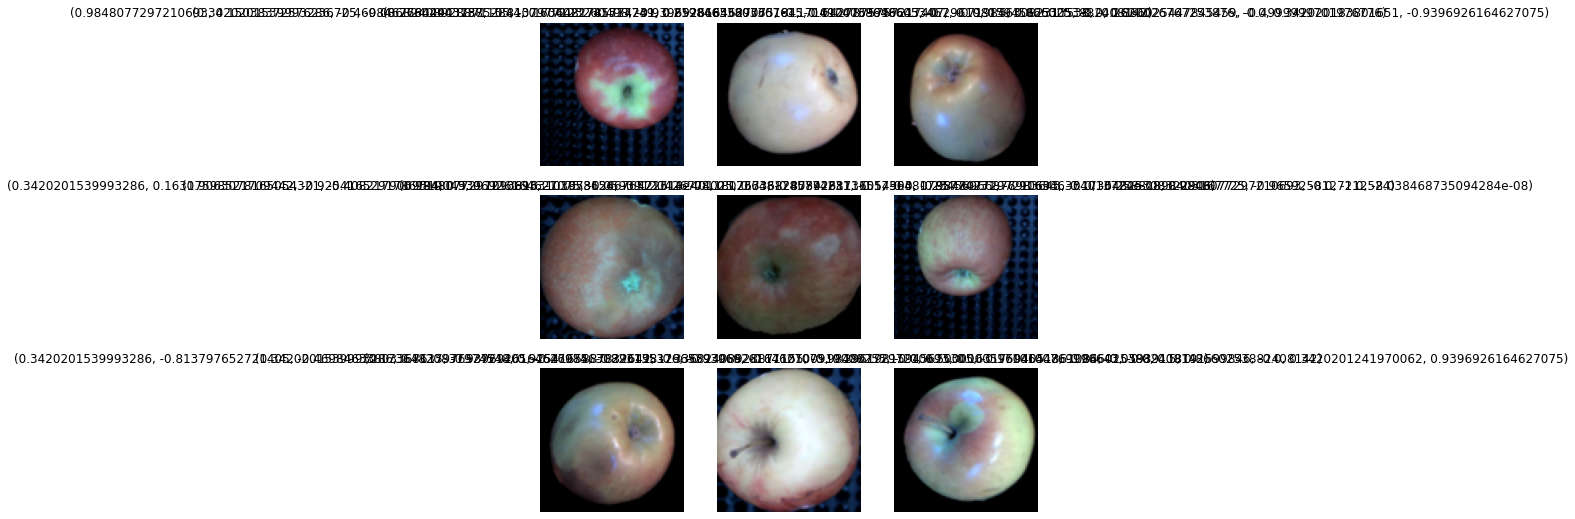

In [34]:
dls2.show_batch()

Einige Äpfel haben kein Hintergrund und andere haben ein künstliche Hintergrund, aber die Ecken sind nicht zu sehen!

In [35]:
learn2 = 

In [ ]:
 learn2.fit_one_cycle(?,?)

unsere Netze können nicht mehr so einfach lernen! 
Das ist aber gut, die Bilder können nicht mehr auswendig gelernt werden!

### Fine-Tunning



In [38]:
learn2.unfreeze()

In [40]:
 learn2.fit_one_cycle(4,lr_max=slice(5e-6,5e-4))

epoch,train_loss,valid_loss,mae,mse,time
0,0.018577,0.142396,0.207554,0.142396,00:27
1,0.016330,0.149410,0.211526,0.149410,00:27
2,0.015352,0.137498,0.205624,0.137498,00:27
3,0.013720,0.138405,0.201386,0.138405,00:27


### Jetzt testen wir nochmal

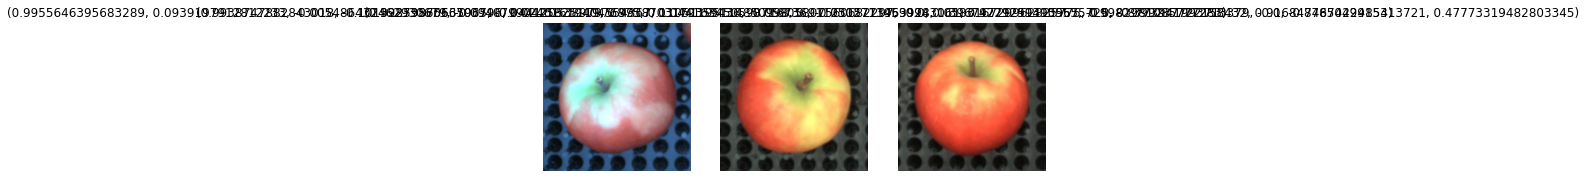

In [51]:
test_dblock = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  = RandomSplitter(valid_pct=0.9,seed=7),
                   get_items = get_image_files,
                   get_y = get_mat,
                   item_tfms = Resize(im_size), 
                  )



#test_path = Path()/'../../Testset'
test_dls = test_dblock.dataloaders(test_path,bs=3)
test_dls.show_batch()

learn2.dls = test_dls

X-MAE in Degrees = 36.72180173789515 	 	 Z-MAE in Degrees = 24.40295993807437

 	 Average MAE in Degrees = 30.562380837984755
info: this returns [y_pred_d,y_real_d,y_diff_d] in case you need it


<Figure size 432x288 with 0 Axes>

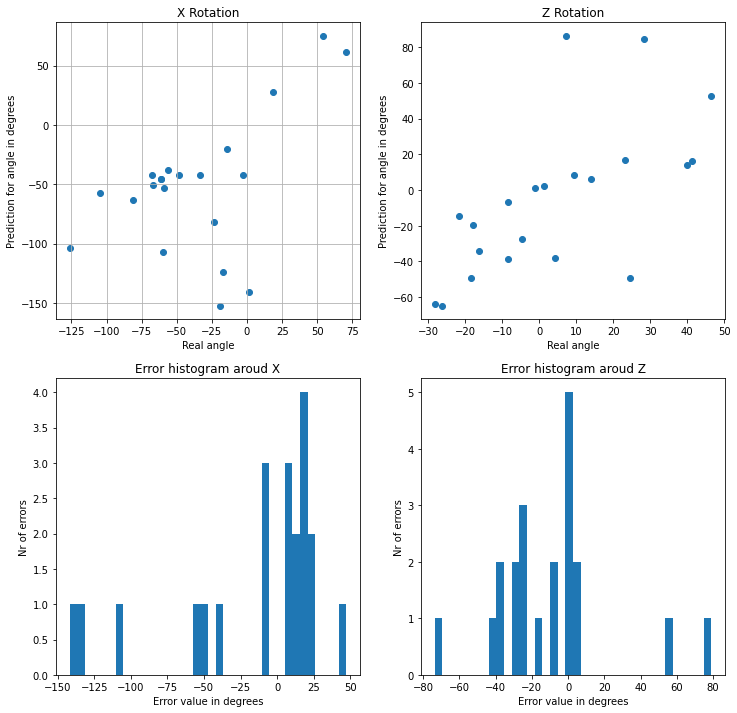

In [52]:
my_interpreter(learn2);

Das ist besser als raten, aber der Fehler ist noch zu groß!


## Warum klappt es noch nicht?

### Problem: Echte Daten unterscheiden sich von Trainings-Daten.
Beleuchtung und Hintergrund sind nicht ähnlich
### Lösung: Daten so ähnlich wie möglich zu echten Daten generieren. 


### Problem: Es gibt keine echte Daten in Datensatz
### Lösung: Echte Daten hinzufugen. 
Aber wie kann ich eine Rotation als mensch im Bild erkennen? 
- Vergleichsbild und Ergebnisse von der voraussage benutzen. Bilder die OK sind können zum Datensatz hinzugefügt werden. 

### Problem: Die Erkennung ist nicht robust
### Lösung: Data-Augmentation
Data augmentation mit fastai: https://docs.fast.ai/vision.augment.html

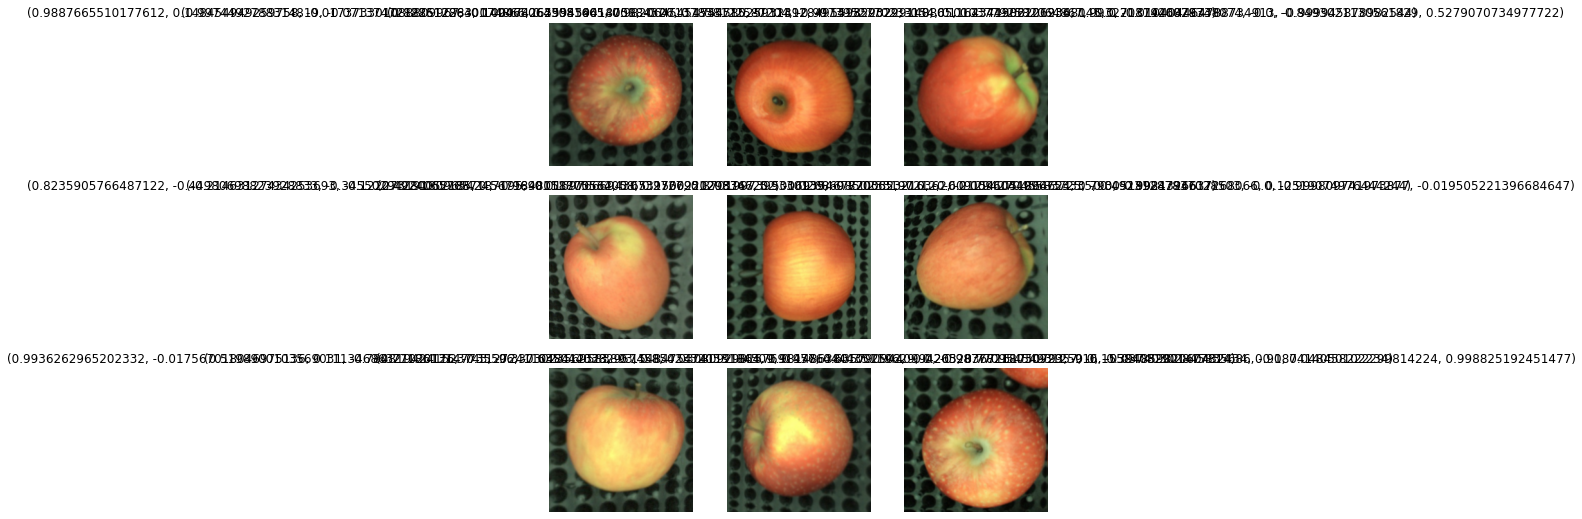

In [78]:
real_dblock = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  = RandomSplitter(valid_pct=0.2,seed=77),
                   get_items = get_image_files,
                   get_y = get_mat,
                   item_tfms = RandomResizedCrop(224, min_scale=0.9,ratio=(0.8,1.1)),
                   batch_tfms=[*aug_transforms(size=224,do_flip=False,flip_vert=False,max_rotate=0)]
                  )


url_photos = 'https://data.ips.biba.uni-bremen.de/Lehre/dsmlpl_SS21/Apples_Reg_real_data.tgz'
path_real_data = untar_data(url_photos)

real_dls = real_dblock.dataloaders(path_real_data,bs=32)
real_dls.show_batch()

SuggestedLRs(lr_min=6.918309954926372e-05, lr_steep=1.5848931980144698e-06)

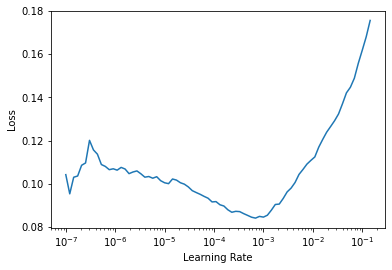

In [64]:
learn2.dls = real_dls
learn2.lr_find()

epoch,train_loss,valid_loss,mae,mse,time
0,0.104299,0.118832,0.223186,0.118832,00:02


epoch,train_loss,valid_loss,mae,mse,time
0,0.098338,0.107933,0.216624,0.107933,00:02
1,0.098716,0.101162,0.209023,0.101162,00:02
2,0.091983,0.100826,0.208057,0.100826,00:02


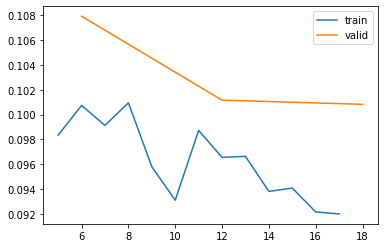

In [65]:
lr=4e-4
learn2.fine_tune(3,lr,1)
learn2.recorder.plot_loss()

X-MAE in Degrees = 47.87005853027778 	 	 Z-MAE in Degrees = 17.674705018993198

 	 Average MAE in Degrees = 32.77238177463549
info: this returns [y_pred_d,y_real_d,y_diff_d] in case you need it


<Figure size 432x288 with 0 Axes>

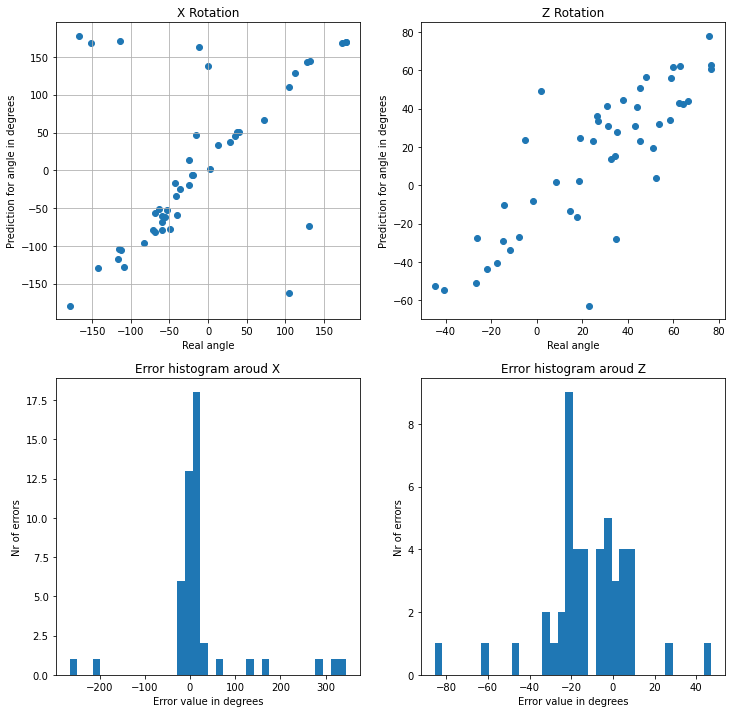

In [66]:
my_interpreter(learn2);

### Jetzt testen wir nochmal

In [67]:
learn2.dls = test_dls

X-MAE in Degrees = 43.442692934882 	 	 Z-MAE in Degrees = 31.03057835416242

 	 Average MAE in Degrees = 37.23663564452221
info: this returns [y_pred_d,y_real_d,y_diff_d] in case you need it


<Figure size 432x288 with 0 Axes>

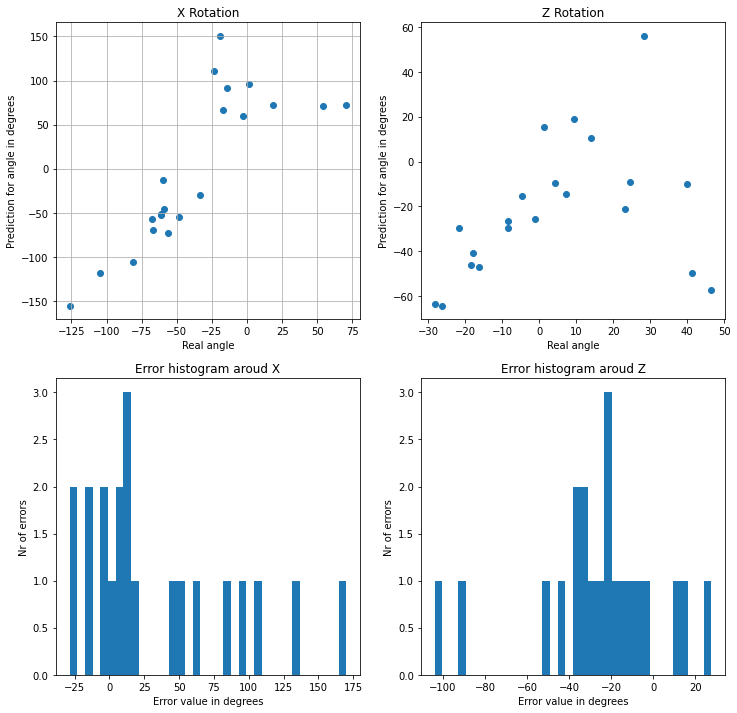

In [68]:
my_interpreter(learn2);

es ist nicht perfekt, aber es ist viel besser geworden!

In [69]:
interp = Interpretation.from_learner(learn2)
interp.top_losses(21)

torch.return_types.topk(
values=tensor([0.5753, 0.4846, 0.4120, 0.3428, 0.3317, 0.3149, 0.2679, 0.1372, 0.0989,
        0.0930, 0.0898, 0.0777, 0.0603, 0.0585, 0.0506, 0.0436, 0.0420, 0.0417,
        0.0361, 0.0254, 0.0145]),
indices=tensor([11, 20,  4,  1,  6,  3,  2,  7, 13, 10, 15, 14, 16,  9, 12, 19, 18,  0,
         5, 17,  8]))

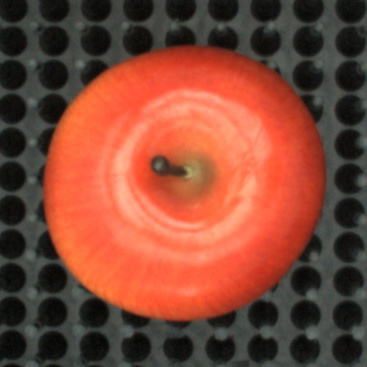

In [77]:
test_dls.valid_ds[11][0]

## Weitere mögliche Verbesserungen:
- Mehr Daten: echte Daten Verwenden aus unterschiedliche Äpfelsorten.
- Weitere state-of-the-art Netze testen
- Neue Optimizers, nicht liniare Funktionen (Mish anstatt Relu), und weitere coole sachen!

In [71]:
learn3 = cnn_learner(dls2,densenet121,pretrained=True,opt_func=ranger)

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.0831763744354248)

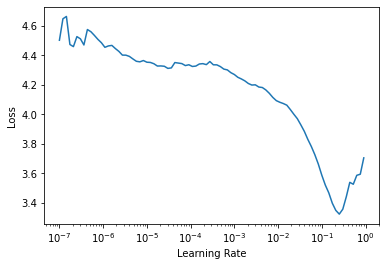

In [72]:
learn3.lr_find()

epoch,train_loss,valid_loss,time
0,0.298914,0.332673,00:30
1,0.050812,0.238738,00:31
2,0.044453,0.197579,00:31
3,0.026554,0.181357,00:30
4,0.016871,0.177454,00:32


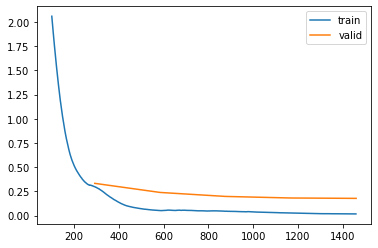

In [73]:
max_lr = 5e-2
learn3.fit_one_cycle(5,max_lr)
learn3.recorder.plot_loss(skip_start=100)

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.00019054606673307717)

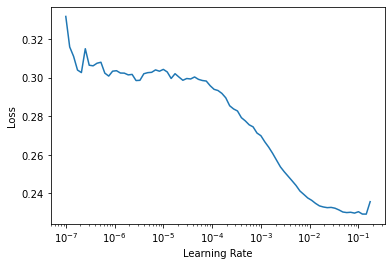

In [74]:
# Go BIG
learn3.dls = dls2_big
learn3.lr_find()

epoch,train_loss,valid_loss,time
0,0.046716,0.179275,01:39
1,0.027282,0.165208,01:39
2,0.020573,0.156631,01:39
3,0.019233,0.155581,01:38


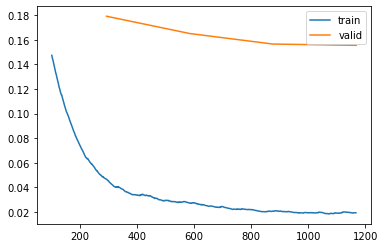

In [75]:
max_lr = 3e-3
learn3.fit_one_cycle(4,max_lr)
learn3.recorder.plot_loss(skip_start=100)

In [76]:
learn3.unfreeze()
learn3.lr_find()

RuntimeError: CUDA out of memory. Tried to allocate 282.00 MiB (GPU 0; 10.91 GiB total capacity; 8.60 GiB already allocated; 288.00 MiB free; 8.98 GiB reserved in total by PyTorch)
Exception raised from malloc at /opt/conda/conda-bld/pytorch_1595629395347/work/c10/cuda/CUDACachingAllocator.cpp:272 (most recent call first):
frame #0: c10::Error::Error(c10::SourceLocation, std::string) + 0x4d (0x7ff4275fe77d in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libc10.so)
frame #1: <unknown function> + 0x20626 (0x7ff48004a626 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libc10_cuda.so)
frame #2: <unknown function> + 0x214f4 (0x7ff48004b4f4 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libc10_cuda.so)
frame #3: c10::cuda::CUDACachingAllocator::raw_alloc(unsigned long) + 0x5e (0x7ff48004412e in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libc10_cuda.so)
frame #4: <unknown function> + 0xca2886 (0x7ff4284d8886 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #5: <unknown function> + 0xca736c (0x7ff4284dd36c in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #6: <unknown function> + 0xc9fd3a (0x7ff4284d5d3a in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #7: <unknown function> + 0xca054e (0x7ff4284d654e in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #8: <unknown function> + 0xca0c10 (0x7ff4284d6c10 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #9: at::native::cudnn_convolution_backward_weight(c10::ArrayRef<long>, at::Tensor const&, at::Tensor const&, c10::ArrayRef<long>, c10::ArrayRef<long>, c10::ArrayRef<long>, long, bool, bool) + 0x49 (0x7ff4284d6e69 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #10: <unknown function> + 0xd0183b (0x7ff42853783b in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #11: <unknown function> + 0xd31478 (0x7ff428567478 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #12: at::cudnn_convolution_backward_weight(c10::ArrayRef<long>, at::Tensor const&, at::Tensor const&, c10::ArrayRef<long>, c10::ArrayRef<long>, c10::ArrayRef<long>, long, bool, bool) + 0x1ad (0x7ff45ea7d70d in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #13: at::native::cudnn_convolution_backward(at::Tensor const&, at::Tensor const&, at::Tensor const&, c10::ArrayRef<long>, c10::ArrayRef<long>, c10::ArrayRef<long>, long, bool, bool, std::array<bool, 2ul>) + 0x18a (0x7ff4284d0a8a in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #14: <unknown function> + 0xd01745 (0x7ff428537745 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #15: <unknown function> + 0xd314d4 (0x7ff4285674d4 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #16: at::cudnn_convolution_backward(at::Tensor const&, at::Tensor const&, at::Tensor const&, c10::ArrayRef<long>, c10::ArrayRef<long>, c10::ArrayRef<long>, long, bool, bool, std::array<bool, 2ul>) + 0x1e2 (0x7ff45ea8c6a2 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #17: <unknown function> + 0x2c250c2 (0x7ff4607500c2 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #18: <unknown function> + 0x2c39684 (0x7ff460764684 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #19: at::cudnn_convolution_backward(at::Tensor const&, at::Tensor const&, at::Tensor const&, c10::ArrayRef<long>, c10::ArrayRef<long>, c10::ArrayRef<long>, long, bool, bool, std::array<bool, 2ul>) + 0x1e2 (0x7ff45ea8c6a2 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #20: torch::autograd::generated::CudnnConvolutionBackward::apply(std::vector<at::Tensor, std::allocator<at::Tensor> >&&) + 0x258 (0x7ff4605d7098 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #21: <unknown function> + 0x30d1017 (0x7ff460bfc017 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #22: torch::autograd::Engine::evaluate_function(std::shared_ptr<torch::autograd::GraphTask>&, torch::autograd::Node*, torch::autograd::InputBuffer&, std::shared_ptr<torch::autograd::ReadyQueue> const&) + 0x1400 (0x7ff460bf7860 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #23: torch::autograd::Engine::thread_main(std::shared_ptr<torch::autograd::GraphTask> const&) + 0x451 (0x7ff460bf8401 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #24: torch::autograd::Engine::thread_init(int, std::shared_ptr<torch::autograd::ReadyQueue> const&, bool) + 0x89 (0x7ff460bf0579 in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #25: torch::autograd::python::PythonEngine::thread_init(int, std::shared_ptr<torch::autograd::ReadyQueue> const&, bool) + 0x4a (0x7ff480b871ba in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/torch/lib/libtorch_python.so)
frame #26: <unknown function> + 0xc819d (0x7ff49c81619d in /home/ara/anaconda3/envs/fastai2020/lib/python3.8/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6)
frame #27: <unknown function> + 0x76db (0x7ff49fbbe6db in /lib/x86_64-linux-gnu/libpthread.so.0)
frame #28: clone + 0x3f (0x7ff49f8e788f in /lib/x86_64-linux-gnu/libc.so.6)


In [ ]:
learn3.fit_one_cycle(7,lr_max=slice(2e-5,2e-3))
learn3.recorder.plot_loss(skip_start=100)

In [ ]:
my_interpreter(learn3);

In [ ]:
learn3.dls = real_dls
learn3.lr_find()

In [ ]:
lr=1e-4
learn3.fine_tune(4,lr,1)
learn3.recorder.plot_loss()

my_interpreter(learn3);

### Jetzt testen wir nochmal

In [ ]:
learn3.dls = test_dls

In [ ]:
my_interpreter(learn3);

es ist nicht perfekt, aber es ist viel besser geworden!

In [ ]:
interp = Interpretation.from_learner(learn3)
interp.top_losses(21)

In [ ]:
test_dls.valid_ds[19][0]